In [ ]:
# %matplotlib ipympl

# this is not working rn come back to it later

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from scipy import stats



STRATEGIES = ['allgather_A_col', 'allgather_A_col_no_compute',
              'allgather_A_row', 'allgather_A_row_no_compute',
              'allgather_B_col', 'allgather_B_col_no_compute',
              'allgather_B_row', 'allgather_B_row_no_compute',
              'reducescatter_C_col', 'reducescatter_C_col_no_compute',
              'reducescatter_C_row', 'reducescatter_C_row_no_compute',
              'broadcast_based', 'broadcast_based_no_compute',
              'broadcast_based_with_overlap', 'broadcast_based_with_overlap_no_compute'] # removed throughput_test for now

COLUMN_NAMES = ["strategy", "size", "m", "n", "k", "throughput", "time", "memory"]

In [2]:
throughput = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n1-benchmark.csv", names=COLUMN_NAMES)
n2 = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n2-benchmark.csv", names=COLUMN_NAMES)
n4 = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n4-benchmark.csv", names=COLUMN_NAMES)
n6 = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n6-benchmark.csv", names=COLUMN_NAMES)
n8 = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n8-benchmark.csv", names=COLUMN_NAMES)
n10 = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n10-benchmark.csv", names=COLUMN_NAMES)
n12 = pd.read_csv("../gemm-benchmarks-condensed/nocheck-n12-benchmark.csv", names=COLUMN_NAMES)


In [3]:
# scratch

n8[n8["strategy"] == "allgather_A_row"]["size"].iloc[0]

8

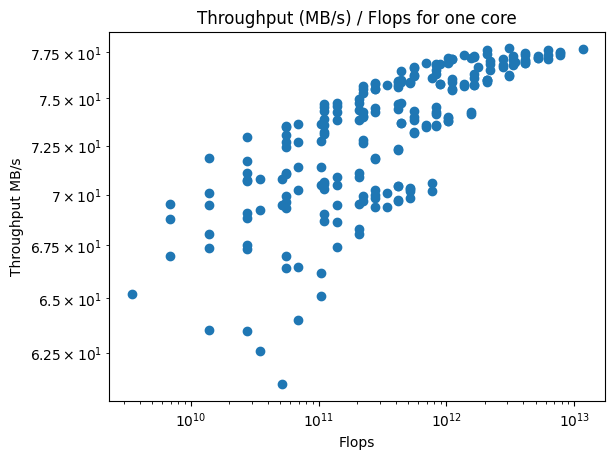

In [4]:
# basic throuput readings for 1 processor

plt.scatter(2 * throughput["m"] * throughput["n"] * throughput["k"], throughput["throughput"])

plt.xlabel("Flops")
plt.xscale("log")
plt.ylabel("Throughput MB/s")
plt.yscale("log")
plt.title("Throughput (MB/s) / Flops for one core")
         
plt.show()

# this shows us that we can suck about 77 mb/s of throughput through one core

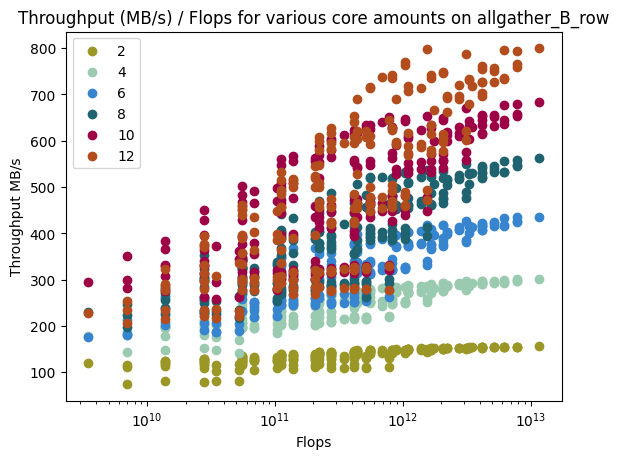

In [5]:
# throughput / flops for various sizes across one strategy

STRATEGY = "allgather_B_row"

all_one_strategy = [n2[n2["strategy"] == STRATEGY], n4[n4["strategy"] == STRATEGY], n6[n6["strategy"] == STRATEGY], n8[n8["strategy"] == STRATEGY], n10[n10["strategy"] == STRATEGY], n12[n12["strategy"] == STRATEGY]]

for df in all_one_strategy:
    plt.scatter(2 * df["m"] * df["n"] * df["k"], df["throughput"], color=np.random.rand(3,), label=f"{df['size'].iloc[0]}")

plt.xlabel("Flops")
plt.xscale("log")
plt.ylabel("Throughput MB/s")
# plt.yscale("log")
plt.title(f"Throughput (MB/s) / Flops for various core amounts on {STRATEGY}")

plt.legend()
plt.show()

# We can see that more processor power is being used as we increase the number of cores

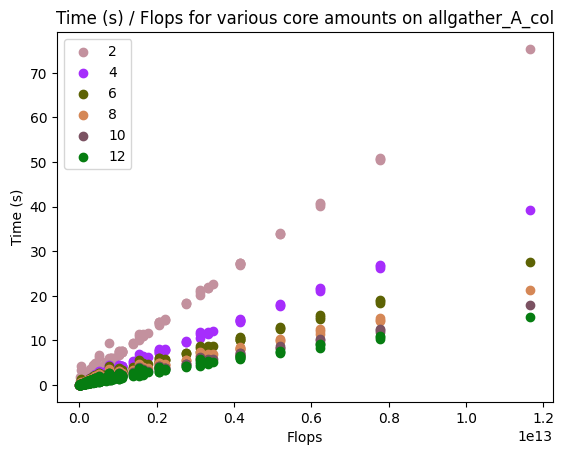

In [6]:
# time / flops for various sizes across one strategy

STRATEGY = "allgather_A_col"

all_one_strategy = [n2[n2["strategy"] == STRATEGY], n4[n4["strategy"] == STRATEGY], n6[n6["strategy"] == STRATEGY], n8[n8["strategy"] == STRATEGY], n10[n10["strategy"] == STRATEGY], n12[n12["strategy"] == STRATEGY]]

for df in all_one_strategy:
    plt.scatter(2 * df["m"] * df["n"] * df["k"], df["time"], color=np.random.rand(3,), label=f"{df['size'].iloc[0]}")

plt.xlabel("Flops")
# plt.xscale("log")
plt.ylabel("Time (s)")
# plt.yscale("log")
plt.title(f"Time (s) / Flops for various core amounts on {STRATEGY}")

plt.legend()
plt.show()

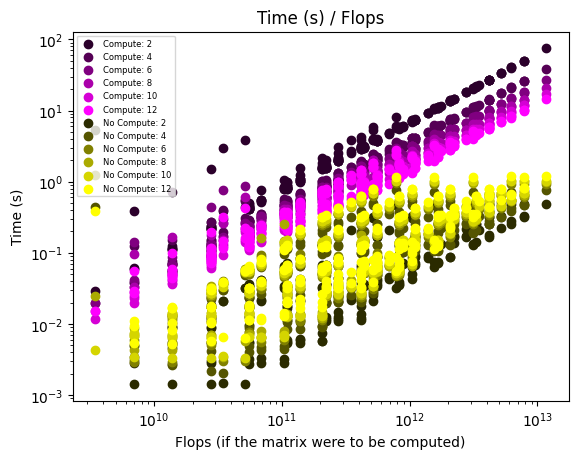

In [7]:
# compute vs no compute

STRATEGY = "allgather_B_row"
STRATEGY_NO_COMPUTE = f"{STRATEGY}_no_compute"

compute_strategy = [n2[n2["strategy"] == STRATEGY], n4[n4["strategy"] == STRATEGY], n6[n6["strategy"] == STRATEGY], n8[n8["strategy"] == STRATEGY], n10[n10["strategy"] == STRATEGY], n12[n12["strategy"] == STRATEGY]]
no_compute_strategy = [n2[n2["strategy"] == STRATEGY_NO_COMPUTE], n4[n4["strategy"] == STRATEGY_NO_COMPUTE], n6[n6["strategy"] == STRATEGY_NO_COMPUTE], n8[n8["strategy"] == STRATEGY_NO_COMPUTE], n10[n10["strategy"] == STRATEGY_NO_COMPUTE], n12[n12["strategy"] == STRATEGY_NO_COMPUTE]]


for df in compute_strategy:
    plt.scatter(2 * df["m"] * df["n"] * df["k"], df["time"], color=(df['size'].iloc[0] / 12, 0, df['size'].iloc[0] / 12), label=f"Compute: {df['size'].iloc[0]}")

for df in no_compute_strategy:
    plt.scatter(2 * df["m"] * df["n"] * df["k"], df["time"], color=(df['size'].iloc[0] / 12, df['size'].iloc[0] / 12, 0), label=f"No Compute: {df['size'].iloc[0]}")

plt.xlabel("Flops (if the matrix were to be computed)")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("Time (s) / Flops")

plt.legend(fontsize=6)
plt.show()

# we can see that for higher number of cores there is a bigger cost to communication but when we actually do the computation
# the matrix is split along the cores so small in some places with high # of cores that the matrix multiplication is almost negligble 

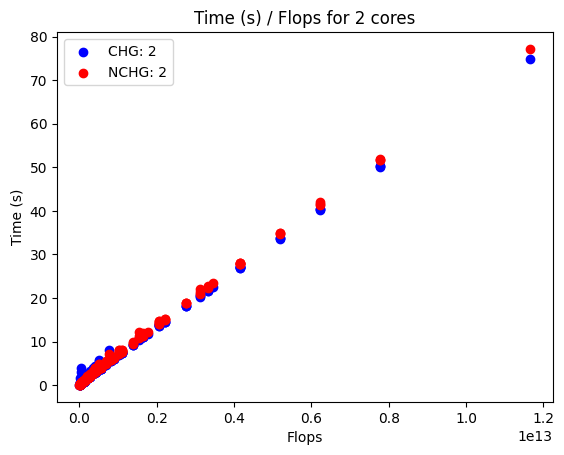

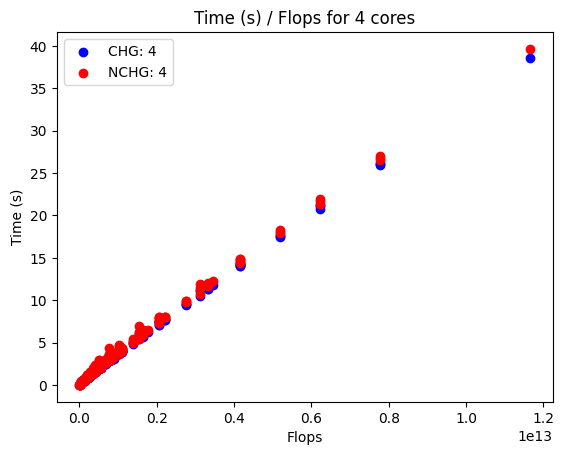

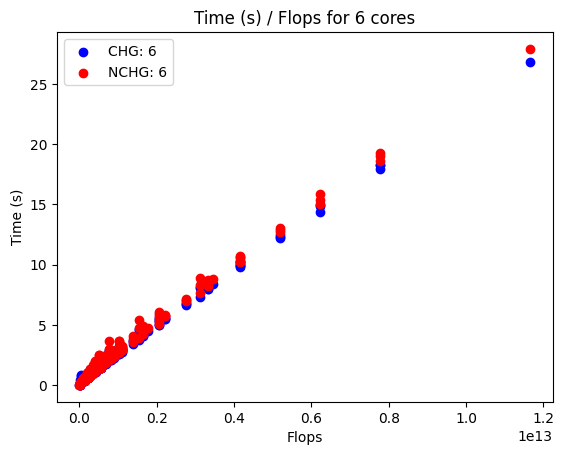

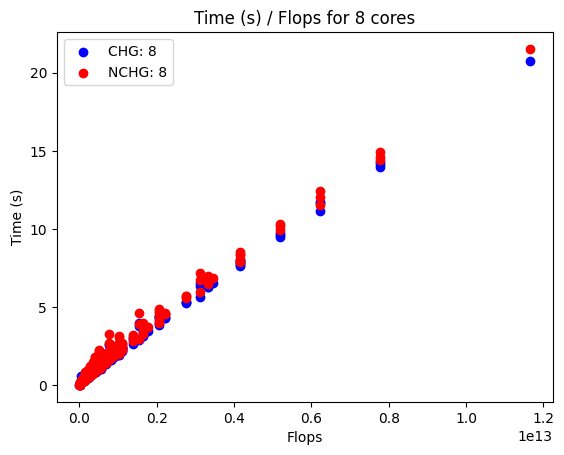

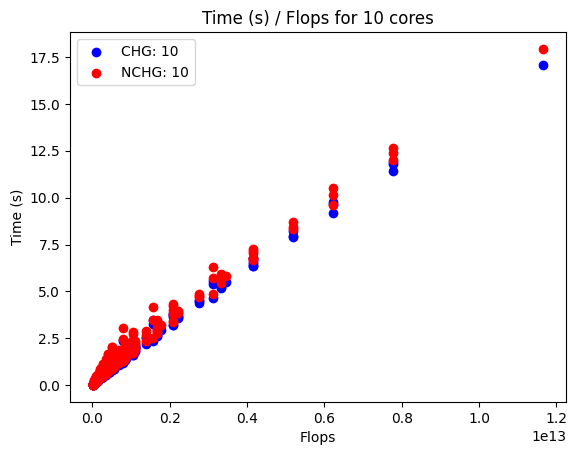

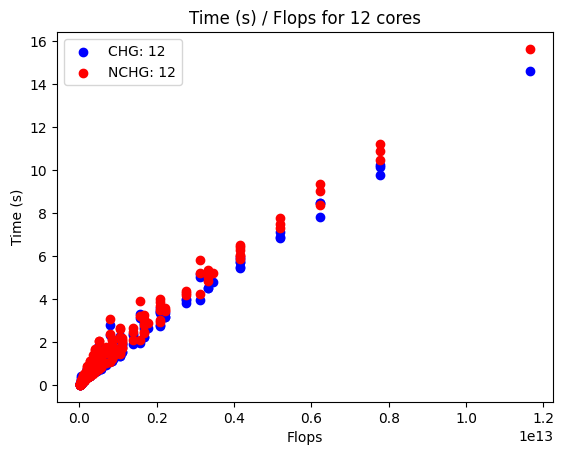

In [8]:
# strategy vs broadcast_based
STRATEGY = "allgather_B_row"
chg = [n2[n2["strategy"] == STRATEGY], n4[n4["strategy"] == STRATEGY], n6[n6["strategy"] == STRATEGY], n8[n8["strategy"] == STRATEGY], n10[n10["strategy"] == STRATEGY], n12[n12["strategy"] == STRATEGY]]
STANDARD_STRATEGY = "broadcast_based_with_overlap"
nchg = [n2[n2["strategy"] == STANDARD_STRATEGY], n4[n4["strategy"] == STANDARD_STRATEGY], n6[n6["strategy"] == STANDARD_STRATEGY], n8[n8["strategy"] == STANDARD_STRATEGY], n10[n10["strategy"] == STANDARD_STRATEGY], n12[n12["strategy"] == STANDARD_STRATEGY]]

for chg_df, nchg_df in zip(chg, nchg):
    plt.scatter(2 * chg_df["m"] * chg_df["n"] * chg_df["k"], chg_df["time"], color="blue", label=f"CHG: {chg_df['size'].iloc[0]}")
    plt.scatter(2 * nchg_df["m"] * nchg_df["n"] * nchg_df["k"], nchg_df["time"], color="red", label=f"NCHG: {nchg_df['size'].iloc[0]}")

    plt.xlabel("Flops")
    # plt.xscale("log")
    plt.ylabel("Time (s)")
    # plt.yscale("log")
    plt.title(f"Time (s) / Flops for {chg_df['size'].iloc[0]} cores")
    plt.legend()
    plt.show()



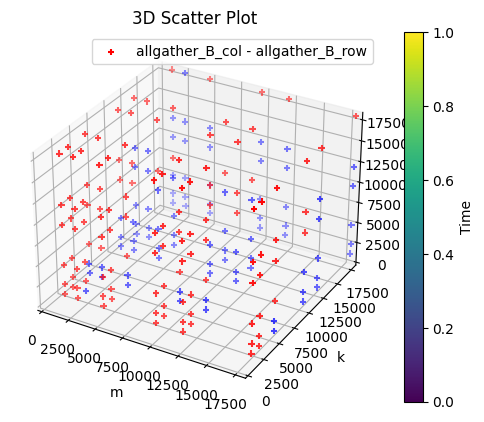

In [40]:
# Here we are directly comparing algorithms

STRATEGY_1 = "allgather_B_col"
STRATEGY_2 = "allgather_B_row"
strat1 = [n2[n2["strategy"] == STRATEGY_1], n4[n4["strategy"] == STRATEGY_1], n6[n6["strategy"] == STRATEGY_1], n8[n8["strategy"] == STRATEGY_1], n10[n10["strategy"] == STRATEGY_1], n12[n12["strategy"] == STRATEGY_1]]
strat2 = [n2[n2["strategy"] == STRATEGY_2], n4[n4["strategy"] == STRATEGY_2], n6[n6["strategy"] == STRATEGY_2], n8[n8["strategy"] == STRATEGY_2], n10[n10["strategy"] == STRATEGY_2], n12[n12["strategy"] == STRATEGY_2]]

# max is 5
core_index = 5

time_difference = strat1[core_index]["time"].values - strat2[core_index]["time"].values
colors = ["red" if td < 0 else "blue" for td in time_difference]

# norm = plt.Normalize(strat1[core_index]["time"].min(), strat1[core_index]["time"].max())
# norm = plt.Normalize(time_difference.min(), time_difference.max())
# cmap = plt.cm.plasma

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(strat1[core_index]["m"], strat1[core_index]["k"], strat1[core_index]["n"], c=colors, label=f"{STRATEGY_1} - {STRATEGY_2}", marker="+")

cbar = plt.colorbar(sc)
cbar.set_label('Time')


ax.set_xlabel('m')
ax.set_ylabel('k')
ax.set_zlabel('n')
ax.set_title('3D Scatter Plot')

ax.set_xlim([0, strat1[core_index]["m"].max()])
ax.set_ylim([0, strat1[core_index]["k"].max()])
ax.set_zlim([0, strat1[core_index]["n"].max()])

plt.legend()

plt.show()

# Red if strategy2 was faster blue if strategy 1 was faster

In [ ]:
# below here is the old stuff

In [ ]:
FILENAME = "../initial-benchmarks/nocheck-n8-benchmark.csv"
df = pd.read_csv(FILENAME, names=["strategy", "size", "m", "n", "k", "throughput", "time", "memory"])

In [ ]:
grouped = df.groupby('strategy')

# input the strategy name to get the df with that strategy
strategy_dict = {}

for strategy, group_df in grouped:
    strategy_dict[strategy] = group_df

In [ ]:
strategy_dict["reducescatter_C_col"]

In [ ]:
current_strategy = "allgather_A_col"
curr_df = strategy_dict[current_strategy]


# Calculate FLOPS
flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']
flops
# Plot throughput/FLOPS graph
plt.figure(figsize=(10, 6))
plt.plot(flops, curr_df['throughput'], marker='o', linestyle='')
plt.xscale('log')
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title(f"Throughput vs FLOPS for {current_strategy}")
plt.grid(True)
plt.show()

# this basically shows us how the max throughput we can get of a node with x number of cores
# it also shows how increasing the problem size allows for more effective cpu use

In [ ]:
current_strategy = "allgather_A_col"
curr_df = strategy_dict[current_strategy]

# Calculate FLOPS
flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(flops, curr_df['throughput'])

# Plot throughput/FLOPS graph with regression line
plt.figure(figsize=(10, 6))
plt.plot(flops, curr_df['throughput'], marker='o', linestyle='', label='Data Points')
plt.plot(flops, intercept + slope * flops, linestyle='-', color='red', label='Regression Line')
plt.xscale('log')
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title(f"Throughput vs FLOPS for {current_strategy} with Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# the regression is pretty useless

In [ ]:
plt.figure(figsize=(10, 6))

# Iterate over each strategy
for strategy in STRATEGIES:
    # Select DataFrame for the current strategy
    curr_df = strategy_dict[strategy]
    
    # Calculate FLOPS
    flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(flops, curr_df['throughput'])
    
    # Plot data points
    # plt.scatter(flops, curr_df['throughput'], label=strategy)
    
    # Plot regression line
    plt.plot(flops, intercept + slope * flops, linestyle='-', label=f'Regression Line: {strategy}')
    
# Add labels and title
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title('Throughput vs FLOPS with Regression Lines for All Strategies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()